In [ ]:
import gdown
import zipfile

In [ ]:
url = "https://drive.google.com/file/d/1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE/view?usp=sharing"

In [ ]:
file_id = url.split("/")[-2]
file_id

'1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE'

In [ ]:
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix + file_id, 'garbage.zip')

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE&confirm=t&uuid=ec24f3a9-0247-4212-a030-f75d10f21355
To: /content/garbage.zip
100%|██████████| 133M/133M [00:02<00:00, 49.7MB/s]


'garbage.zip'

In [ ]:
zip_path = "garbage.zip"
extract_path = ""

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete!")

Extraction complete!


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
# import cv2
# import imghdr
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

base_dir = "garbage"

def check_image_formats(base_dir, valid_exts):
    all_images_valid = True
    invalid_images = []

    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
        if not os.path.isdir(sub_dir_path):
            continue

        for file_name in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path, file_name)

            if os.path.isdir(file_path):
                continue

            file_ext = file_name.split('.')[-1].lower()
            if file_ext not in valid_exts:
                all_images_valid = False
                invalid_images.append(file_path)

    if all_images_valid:
        print("All images are in the specified formats.")
    else:
        print("The following images are not in the specified formats:")
        for img in invalid_images:
            print(img)

check_image_formats(base_dir, image_exts)


All images are in the specified formats.


In [ ]:
import os
import random

base_path = "garbage"

for sub_dir in os.listdir(base_path):
    sub_dir_path = os.path.join(base_path, sub_dir)
    images = os.listdir(sub_dir_path)
    total_images = len(images)

    if total_images > 700:
        images_to_delete = total_images - 700

        for _ in range(images_to_delete):
            random_img = random.choice(images)
            delete_img = os.path.join(sub_dir_path, random_img)

            os.remove(delete_img)
            images.remove(random_img)

        print(f"Deleted {images_to_delete} images in {sub_dir}")
    else:
        print(f"No deletion needed in {sub_dir}")


Deleted 426 images in clothes
Deleted 245 images in battery
Deleted 350 images in paper
No deletion needed in green-glass
No deletion needed in trash
Deleted 191 images in cardboard
Deleted 165 images in plastic
Deleted 75 images in white-glass
Deleted 69 images in metal
No deletion needed in brown-glass
Deleted 285 images in biological
Deleted 1277 images in shoes


In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 60
NUM_CLASSES = 12

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "garbage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 8233 files belonging to 12 classes.


In [ ]:
class_names = dataset.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [ ]:
len(dataset)

258

In [ ]:
data_dir = "garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))

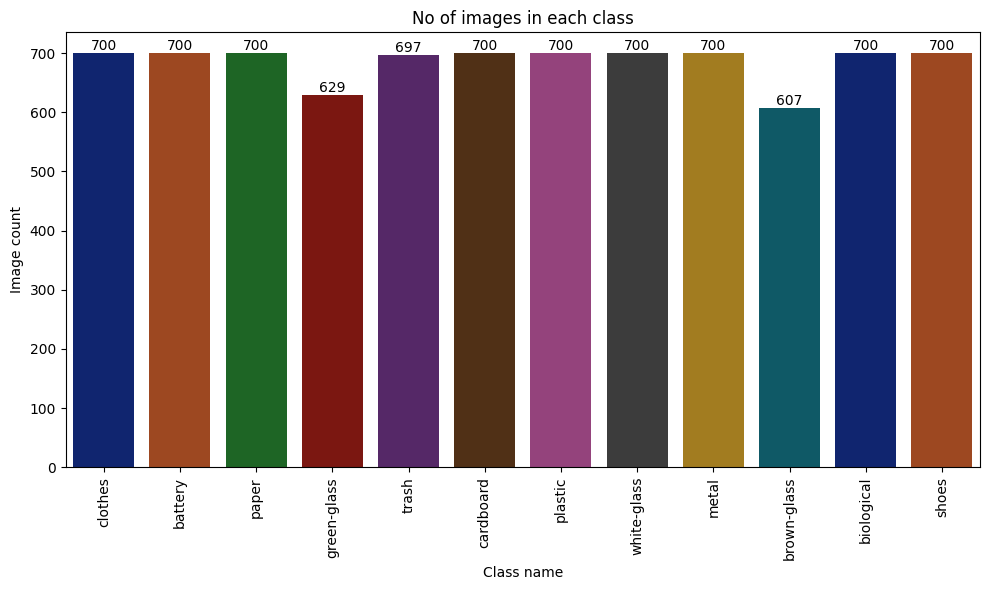

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

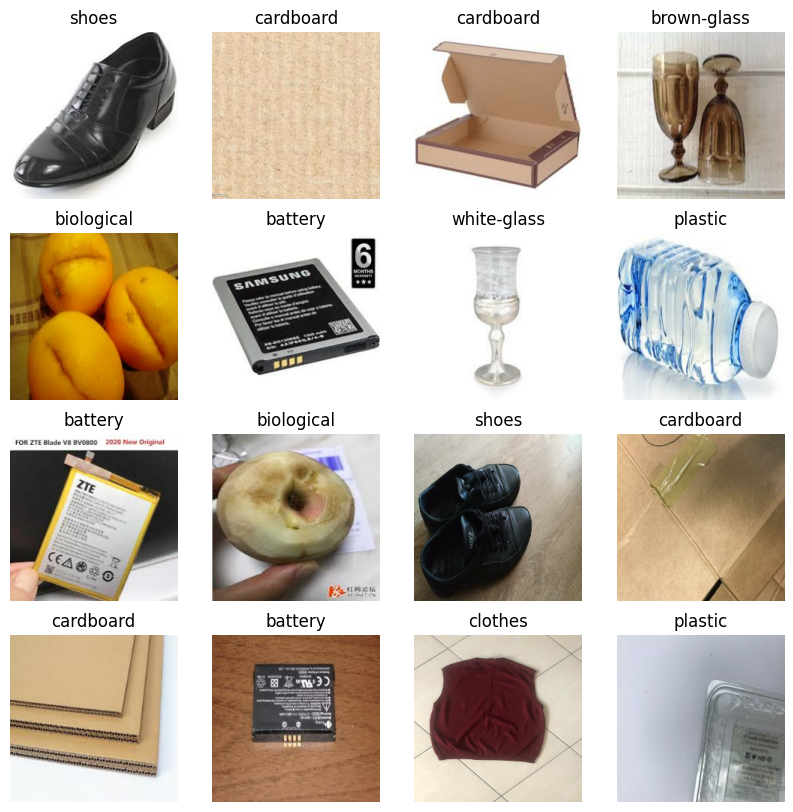

In [ ]:
plt.figure(figsize=(10,10))

for img_batch, label in dataset.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(img_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [ ]:
def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  assert (train_split + test_split + val_split) == 1
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = split_dataset(dataset)

In [ ]:
print(f"training data : {len(train_ds)}")
print(f"validation data : {len(val_ds)}")
print(f"testing data : {len(test_ds)}")

training data : 206
validation data : 25
testing data : 27


In [ ]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomBrightness(factor=0.2),
    layers.GaussianNoise(0.1),
    layers.RandomCrop(height=200, width=200)
])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications


IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 60
NUM_CLASSES = 12

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomBrightness(factor=0.2),
    layers.GaussianNoise(0.1),
    layers.RandomCrop(height=200, width=200),
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE)
])

base_model = applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model.trainable = False

model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    data_augmentation,
    layers.Rescaling(1.0/255),
    layers.BatchNormalization(),
    base_model,
    tf.keras.layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# base_model.summary()



219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_203              │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_resnet_v2 (Functional)     │ (None, 5, 5, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 1536)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6144)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,573,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,912,952 (213.29 MB)

 Trainable params: 1,576,210 (6.01 MB)

 Non-trainable params: 54,336,742 (207.28 MB)

In [ ]:
def create_callback(model_name):
    early_stop = EarlyStopping(
        monitor='val_loss',
        min_delta=0.00001,
        patience=10,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False
    )

    reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                factor=0.2,
                                                                patience=2,
                                                                verbose=1,
                                                                min_lr=0.00001)

    callback = [early_stop, reduce_learning_rate]
    return callback

In [ ]:
InceptionResnet = create_callback(model)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    steps_per_epoch=len(train_ds),
    validation_steps=len(val_ds),
    epochs=50,
    callbacks = InceptionResnet
)

Epoch 1/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.3120 - loss: 2.5062

### Add Gas features

In [6]:
import gdown
import zipfile
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
url = "https://drive.google.com/file/d/1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE/view?usp=sharing"

file_id = url.split("/")[-2]
file_id

'1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE'

In [3]:
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix + file_id, 'garbage.zip')

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE&confirm=t&uuid=719e63d4-09d0-4338-b64a-7510d0e1fcba
To: /content/garbage.zip
100%|██████████| 133M/133M [00:02<00:00, 62.3MB/s]


'garbage.zip'

In [5]:
zip_path = "/content/garbage.zip"
extract_path = ""

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete!")

Extraction complete!


In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

base_dir = "/content/garbage"

def check_image_formats(base_dir, valid_exts):
    all_images_valid = True
    invalid_images = []

    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
        if not os.path.isdir(sub_dir_path):
            continue

        for file_name in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path, file_name)

            if os.path.isdir(file_path):
                continue

            file_ext = file_name.split('.')[-1].lower()
            if file_ext not in valid_exts:
                all_images_valid = False
                invalid_images.append(file_path)

    if all_images_valid:
        print("All images are in the specified formats.")
    else:
        print("The following images are not in the specified formats:")
        for img in invalid_images:
            print(img)

check_image_formats(base_dir, image_exts)


All images are in the specified formats.


In [9]:
data_dir = "/content/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))

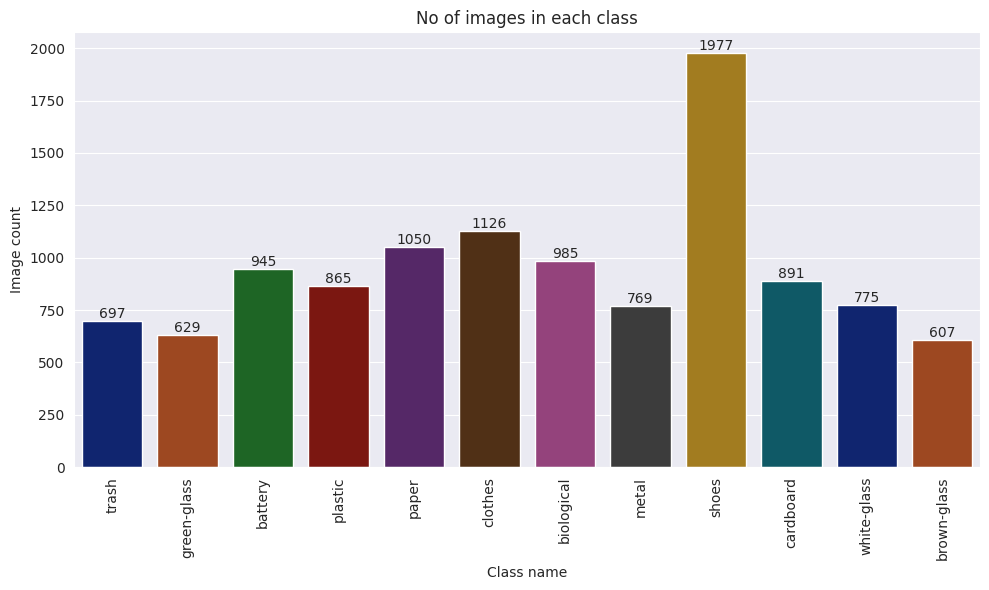

In [10]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
import os
import random

base_path = "/content/garbage"

for sub_dir in os.listdir(base_path):
    sub_dir_path = os.path.join(base_path, sub_dir)
    images = os.listdir(sub_dir_path)
    total_images = len(images)

    if total_images > 700:
        images_to_delete = total_images - 700

        for _ in range(images_to_delete):
            random_img = random.choice(images)
            delete_img = os.path.join(sub_dir_path, random_img)

            os.remove(delete_img)
            images.remove(random_img)

        print(f"Deleted {images_to_delete} images in {sub_dir}")
    else:
        print(f"No deletion needed in {sub_dir}")


No deletion needed in trash
No deletion needed in green-glass
Deleted 245 images in battery
Deleted 165 images in plastic
Deleted 350 images in paper
Deleted 426 images in clothes
Deleted 285 images in biological
Deleted 69 images in metal
Deleted 1277 images in shoes
Deleted 191 images in cardboard
Deleted 75 images in white-glass
No deletion needed in brown-glass


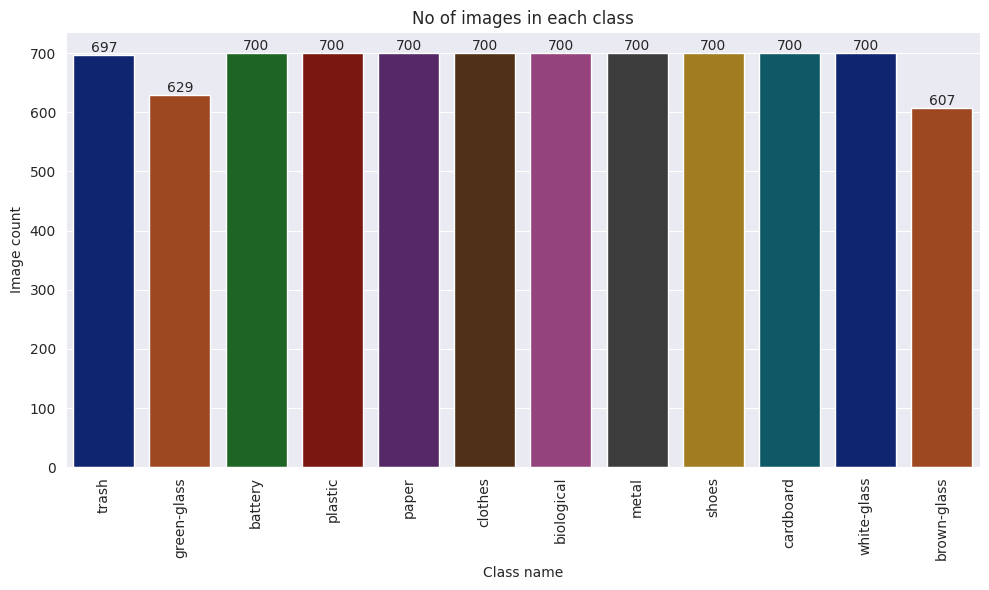

In [13]:
data_dir = "/content/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))



plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
import random
import pandas as pd

garbage_classes = {
    "battery":       {"CH4": (1, 3), "CO2": (550, 650), "CO": (1, 3), "H2S": (0.02, 0.05), "VOCs": (2, 6), "NH3": (0.001, 0.003), "Odor": (3, 5)},
    "biological":    {"CH4": (200, 350), "CO2": (1200, 1600), "CO": (15, 30), "H2S": (0.4, 0.7), "VOCs": (12, 20), "NH3": (0.2, 0.35), "Odor": (8, 9)},
    "brown-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "cardboard":     {"CH4": (2, 4), "CO2": (500, 600), "CO": (2, 4), "H2S": (0.002, 0.006), "VOCs": (0.5, 1), "NH3": (0.001, 0.003), "Odor": (2, 3)},
    "clothes":       {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "green-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "metal":         {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "paper":         {"CH4": (1, 3), "CO2": (500, 600), "CO": (1, 3), "H2S": (0.001, 0.004), "VOCs": (0.3, 0.7), "NH3": (0, 0.002), "Odor": (1, 2)},
    "plastic":       {"CH4": (3, 6), "CO2": (600, 800), "CO": (4, 7), "H2S": (0.002, 0.006), "VOCs": (6, 12), "NH3": (0.001, 0.003), "Odor": (3, 4)},
    "shoes":         {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "trash":         {"CH4": (10, 20), "CO2": (700, 900), "CO": (8, 12), "H2S": (0.05, 0.1), "VOCs": (4, 8), "NH3": (0.01, 0.02), "Odor": (5, 6)},
    "white-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
}

dataset_path = "/content/garbage"

data = []

for category, ranges in garbage_classes.items():
    category_path = os.path.join(dataset_path, category)

    if os.path.exists(category_path):
        for img_file in os.listdir(category_path):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(category_path, img_file)

                sensor_values = {gas: round(random.uniform(*range_val), 3) for gas, range_val in ranges.items()}

                data.append({"image_path": img_path, "label": category, **sensor_values})

df = pd.DataFrame(data)

df.to_csv("garbage_sensor_data.csv", index=False)


In [16]:
path = "/content/garbage_sensor_data.csv"
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,image_path,label,CH4,CO2,CO,H2S,VOCs,NH3,Odor
0,/content/garbage/battery/battery325.jpg,battery,2.275,601.997,2.515,0.048,4.535,0.002,4.335
1,/content/garbage/battery/battery437.jpg,battery,1.945,601.606,1.468,0.045,5.592,0.001,4.638
2,/content/garbage/battery/battery308.jpg,battery,1.619,609.274,1.620,0.044,3.498,0.002,3.811
3,/content/garbage/battery/battery877.jpg,battery,2.994,647.894,1.425,0.027,2.775,0.001,4.164
4,/content/garbage/battery/battery738.jpg,battery,2.066,590.724,1.046,0.039,4.210,0.001,3.382
...,...,...,...,...,...,...,...,...,...
8228,/content/garbage/white-glass/white-glass251.jpg,white-glass,0.000,504.813,0.000,0.000,0.000,0.000,0.000
8229,/content/garbage/white-glass/white-glass472.jpg,white-glass,0.000,541.739,0.000,0.000,0.000,0.000,0.000
8230,/content/garbage/white-glass/white-glass181.jpg,white-glass,0.000,453.835,0.000,0.000,0.000,0.000,0.000
8231,/content/garbage/white-glass/white-glass354.jpg,white-glass,0.000,453.817,0.000,0.000,0.000,0.000,0.000


In [17]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data,test_size=0.2,random_state=42,stratify=data['label'])


print(f"Number of images in the training set: {len(train_df)}")
print(f"Number of images in the validation set: {len(val_df)}")

Number of images in the training set: 6586
Number of images in the validation set: 1647


In [18]:
overall_distribution = data['label'].value_counts(normalize=True) * 100

train_distribution = train_df['label'].value_counts(normalize=True) * 100

val_distribution = val_df['label'].value_counts(normalize=True) * 100


print("Class distribution in the entire dataset:\n")
print(overall_distribution.round(2))
print('-'*40)

print("\nClass distribution in the training set:\n")
print(train_distribution.round(2))
print('-'*40)

print("\nClass distribution in the validation set:\n")
print(val_distribution.round(2))

Class distribution in the entire dataset:

label
battery        8.50
biological     8.50
cardboard      8.50
clothes        8.50
white-glass    8.50
metal          8.50
paper          8.50
plastic        8.50
shoes          8.50
trash          8.47
green-glass    7.64
brown-glass    7.37
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the training set:

label
metal          8.50
white-glass    8.50
cardboard      8.50
clothes        8.50
shoes          8.50
biological     8.50
plastic        8.50
paper          8.50
battery        8.50
trash          8.46
green-glass    7.64
brown-glass    7.38
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the validation set:

label
battery        8.50
white-glass    8.50
plastic        8.50
paper          8.50
clothes        8.50
metal          8.50
cardboard      8.50
shoes          8.50
trash          8.50
biological     8.50
green-glass    7.65
brown

In [19]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
data[['CH4','CO2','CO','H2S','VOCs','NH3','Odor']] = scaling.fit_transform(data[['CH4','CO2','CO','H2S','VOCs','NH3','Odor']])

In [20]:
train_df = data.sample(frac=1,random_state=0).iloc[:6000]
val_df = data.sample(frac=1,random_state=0).iloc[6000:7500]
test_df = data.sample(frac=1,random_state=0).iloc[7500:]

print("training data: ", train_df.shape)
print("validation data: ", val_df.shape)
print("testing data: ", test_df.shape)

training data:  (6000, 9)
validation data:  (1500, 9)
testing data:  (733, 9)


In [24]:
import numpy as np
import cv2
import pandas as pd
import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionResNetV2, EfficientNetB7
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.models import Model


class MultiModalDataGenerator(Sequence):
    def __init__(self, df, batch_size=32, img_size=(224,224), shuffle=True, augmentor=None):
        self.df = df
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.augmentor = augmentor
        self.indices = np.arange(len(df))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_df = self.df.iloc[batch_indices]
        return self.__data_generation(batch_df)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_df):
        batch_size = len(batch_df)
        image_batch = np.zeros((batch_size, *self.img_size, 3), dtype=np.float32)
        gas_batch = np.zeros((batch_size, 7), dtype=np.float32)

        label_mapping = {
            "battery": 0,
            "biological": 1,
            "brown-glass": 2,
            "cardboard": 3,
            "clothes": 4,
            "green-glass": 5,
            "metal": 6,
            "paper": 7,
            "plastic": 8,
            "shoes": 9,
            "trash": 10,
            "white-glass": 11
        }
        num_classes = len(label_mapping)
        labels = np.zeros((batch_size, num_classes), dtype=np.float32)

        for i, row in enumerate(batch_df.itertuples()):
            img = cv2.imread(row.image_path)
            if img is None:
                print("Error reading image:", row.image_path)
                continue
            img = cv2.resize(img, self.img_size)
            img = img.astype(np.float32) / 255.0
            if self.augmentor is not None:
                img = self.augmentor.random_transform(img)
            image_batch[i] = img

            gas_values = [row.CH4, row.CO2, row.CO, row.H2S, row.VOCs, row.NH3, row.Odor]
            gas_batch[i] = np.array(gas_values, dtype=np.float32)

            label_idx = label_mapping.get(row.label)
            if label_idx is not None:
                labels[i, label_idx] = 1

        return ((image_batch, gas_batch), labels)


augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = MultiModalDataGenerator(train_df, batch_size=32, img_size=(224,224), shuffle=True, augmentor=augmentor)
val_generator   = MultiModalDataGenerator(val_df, batch_size=32, img_size=(224,224), shuffle=False, augmentor=None)
test_generator  = MultiModalDataGenerator(test_df, batch_size=32, img_size=(224,224), shuffle=False, augmentor=None)



image_input = Input(shape=(224,224,3), name='image_input')
# Xception
xception = Xception(include_top=False, input_tensor=image_input)
xception.trainable = False
x = xception.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

gas_input = Input(shape=(7,), name='gas_input')
y = Dense(32, activation='relu')(gas_input)
y = BatchNormalization()(y)
y = Dense(64, activation='relu')(y)
y = BatchNormalization()(y)

combined = Concatenate()([x, y])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)
output = Dense(12, activation='softmax', name='output')(z)

model = Model(inputs=[image_input, gas_input], outputs=output)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 94s 447ms/step - accuracy: 0.3736 - loss: 2.1322 - val_accuracy: 0.8404 - val_loss: 0.6234
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 84s 450ms/step - accuracy: 0.7081 - loss: 0.8935 - val_accuracy: 0.8920 - val_loss: 0.3616
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 80s 428ms/step - accuracy: 0.7811 - loss: 0.6567 - val_accuracy: 0.9178 - val_loss: 0.2531
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 80s 429ms/step - accuracy: 0.8183 - loss: 0.5355 - val_accuracy: 0.9307 - val_loss: 0.2099
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 81s 433ms/step - accuracy: 0.8490 - loss: 0.4541 - val_accuracy: 0.9382 - val_loss: 0.1780
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 85s 453ms/step - accuracy: 0.8654 - loss: 0.4141 - val_accuracy: 0.9361 - val_loss: 0.1710
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 84s 450ms/step - accuracy: 0.8686 - loss: 0.3940 - val_accuracy: 0.9436 - val_loss: 0.1636
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 85s 453ms/step - accuracy: 0.8821 - loss: 0

In [71]:
import numpy as np
import matplotlib.pyplot as plt


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


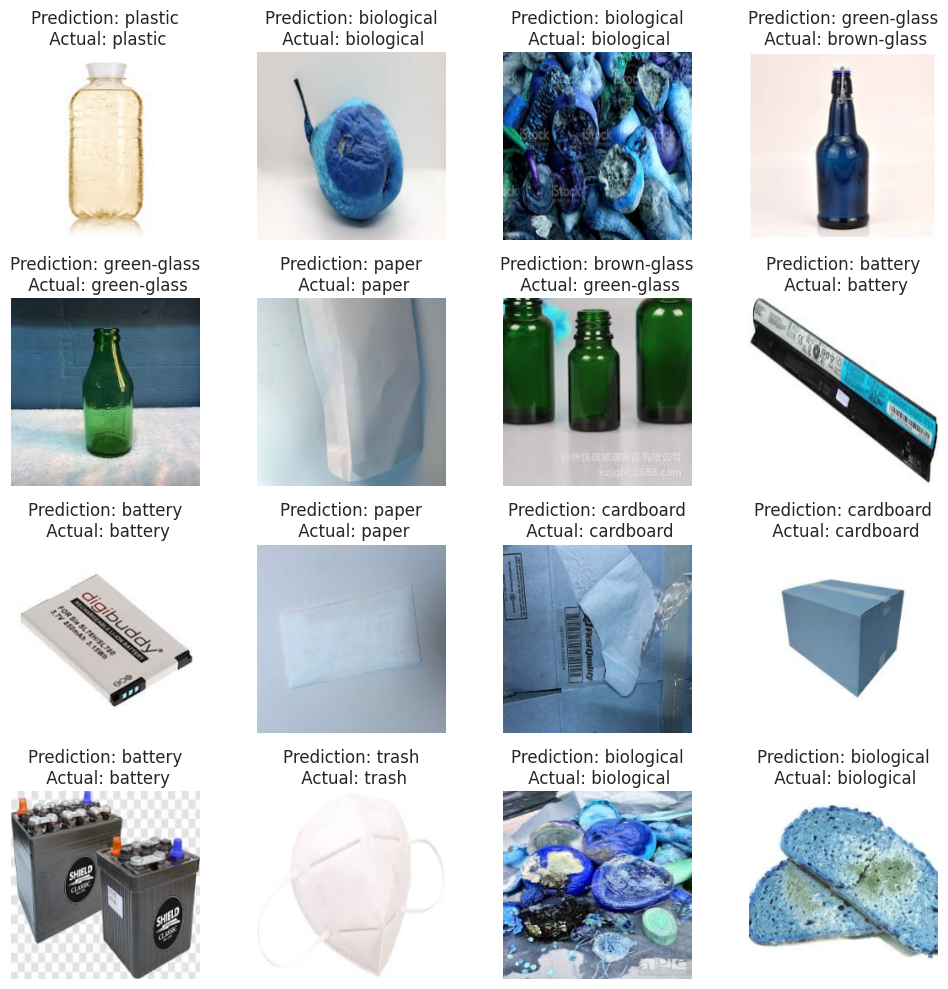

In [104]:
(image_batch, gas_batch), labels = test_generator[0]

pred_probs = model.predict((image_batch, gas_batch))
predicted_class = np.argmax(pred_probs, axis=1)

true_class = np.argmax(labels, axis=1)

class_names = ["battery", "biological", "brown-glass", "cardboard", "clothes",
               "green-glass", "metal", "paper", "plastic", "shoes", "trash", "white-glass"]

fig, axes = plt.subplots(4,4, figsize=(10, 10))
axes = axes.flatten()

for i in range(16):
    img = (image_batch[i] * 255).astype('uint8')
    axes[i].imshow(img)

    pred_label = class_names[predicted_class[i]]
    true_label = class_names[true_class[i]]

    axes[i].set_title(f"Prediction: {pred_label}\n Actual: {true_label}")
    axes[i].axis("off")


plt.tight_layout()
plt.show()
